In [1]:
import pandas
import seaborn
import numpy
import sklearn.preprocessing
import sklearn.impute
import sklearn.feature_selection

%matplotlib inline

# Instructions

- Read both training and test data from CSV files
- Then, identify which columns are numerical and which columns are categorical
- Assess whether the data is balance or imbalance

In [2]:
data_train = pandas.read_csv('../data/high_salary_failure.train.csv').set_index('id')
data_train

,social-security-number,house-number,age-group,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country-code,native-country,label
id,,,,,,,,,,,,,,,,,,
825,418767554.0,5605.0,0.0,private,333838.0,hs-grad,9.0,never-married,adm-clerical,not-in-family,white,male,0.0,0.0,2.0,USA,united-states,0.0
7110,781090834.0,7323.0,3.0,private,205100.0,assoc-voc,11.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,3.0,USA,united-states,1.0
4726,973120412.0,5633.0,3.0,federal-gov,305850.0,prof-school,15.0,married-civ-spouse,exec-managerial,husband,white,male,4.0,0.0,2.0,USA,united-states,1.0
4570,545207638.0,7185.0,2.0,private,182189.0,hs-grad,9.0,married-civ-spouse,craft-repair,husband,white,male,0.0,2.0,4.0,USA,united-states,1.0
24219,872193378.0,5208.0,1.0,state-gov,208406.0,bachelors,13.0,never-married,prof-specialty,not-in-family,white,male,0.0,0.0,1.0,USA,united-states,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10538,224015677.0,941.0,3.0,private,191858.0,some-college,10.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,2.0,USA,united-states,0.0
17709,809202143.0,1882.0,3.0,private,153883.0,bachelors,13.0,married-civ-spouse,prof-specialty,husband,black,male,3.0,0.0,2.0,USA,united-states,1.0
8432,250265741.0,4299.0,0.0,state-gov,292816.0,assoc-voc,11.0,never-married,adm-clerical,own-child,white,female,0.0,0.0,2.0,USA,united-states,0.0


In [3]:
data_test = pandas.read_csv('../data/high_salary_failure.test.csv').set_index('id')
data_test

,social-security-number,house-number,age-group,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country-code,native-country,label
id,,,,,,,,,,,,,,,,,,
23155,590099373.0,8897.0,2.0,private,247111.0,hs-grad,9.0,married-civ-spouse,tech-support,husband,white,male,0.0,0.0,2.0,USA,united-states,1.0
9294,645435063.0,5727.0,2.0,private,101387.0,hs-grad,9.0,married-civ-spouse,other-service,wife,white,female,0.0,0.0,2.0,USA,united-states,0.0
5664,513355643.0,9593.0,0.0,private,138938.0,some-college,10.0,divorced,adm-clerical,not-in-family,white,female,0.0,0.0,2.0,USA,united-states,0.0
22607,595239279.0,6848.0,2.0,private,110028.0,hs-grad,9.0,divorced,sales,not-in-family,white,male,4.0,0.0,3.0,USA,united-states,1.0
26944,351035819.0,3826.0,2.0,private,174395.0,doctorate,16.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,2.0,USA,united-states,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,464613905.0,456.0,2.0,federal-gov,72338.0,some-college,10.0,married-civ-spouse,adm-clerical,husband,asian-pac-islander,male,0.0,0.0,2.0,USA,united-states,1.0
13429,970230605.0,3407.0,2.0,private,176947.0,7th-8th,4.0,never-married,adm-clerical,own-child,white,female,0.0,0.0,0.0,USA,united-states,0.0
7448,749011561.0,7133.0,2.0,private,162003.0,some-college,10.0,divorced,machine-op-inspct,not-in-family,white,male,0.0,0.0,2.0,USA,united-states,0.0


In [4]:
data_train.dtypes

social-security-number    float64
house-number              float64
age-group                 float64
workclass                  object
fnlwgt                    float64
education                  object
education-num             float64
marital-status             object
occupation                 object
relationship               object
race                       object
sex                        object
capitalgain               float64
capitalloss               float64
hoursperweek              float64
native-country-code        object
native-country             object
label                     float64
dtype: object

In [5]:
categorical_features = [
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country-code',
    'native-country'
]

for feature in categorical_features:
    possible_values = data_train[feature].unique()
    print(f"{feature:20s} {possible_values.size:2d} {possible_values}")

workclass             9 ['private' 'federal-gov' 'state-gov' 'local-gov' nan 'self-emp-not-inc'
 'self-emp-inc' 'without-pay' 'never-worked']
education            17 ['hs-grad' 'assoc-voc' 'prof-school' 'bachelors' 'some-college' '11th'
 'masters' '5th-6th' 'assoc-acdm' '1st-4th' '10th' '7th-8th' 'doctorate'
 '12th' '9th' 'preschool' nan]
marital-status        8 ['never-married' 'married-civ-spouse' 'widowed' 'divorced'
 'married-spouse-absent' 'separated' 'married-af-spouse' nan]
occupation           15 ['adm-clerical' 'exec-managerial' 'craft-repair' 'prof-specialty' 'sales'
 nan 'handlers-cleaners' 'other-service' 'tech-support' 'farming-fishing'
 'machine-op-inspct' 'transport-moving' 'priv-house-serv' 'armed-forces'
 'protective-serv']
relationship          7 ['not-in-family' 'husband' 'own-child' 'other-relative' 'unmarried' 'wife'
 nan]
race                  6 ['white' 'asian-pac-islander' 'black' 'amer-indian-eskimo' 'other' nan]
sex                   3 ['male' 'female' nan]
na

In [6]:
numerical_features = [
    'social-security-number',
    'house-number',
    'age-group',
    'fnlwgt',
    'education-num',
    'capitalgain',
    'capitalloss',
    'hoursperweek',
    
]

data_train[numerical_features].describe()

,social-security-number,house-number,age-group,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek
count,1.566600e+04,15655.000000,15664.000000,1.565900e+04,15664.000000,15656.000000,15658.000000,15658.000000
mean,5.525061e+08,5054.042031,1.918667,1.886147e+05,10.458823,0.306528,0.153340,2.048921
std,2.602983e+08,2869.897683,1.252524,1.035616e+05,2.610434,0.936706,0.650184,0.875771
min,1.000850e+08,101.000000,0.000000,1.930200e+04,1.000000,0.000000,0.000000,0.000000
25%,3.222344e+08,2607.000000,1.000000,1.173630e+05,9.000000,0.000000,0.000000,2.000000
50%,5.539719e+08,5006.000000,2.000000,1.775780e+05,10.000000,0.000000,0.000000,2.000000
75%,7.801364e+08,7582.000000,3.000000,2.364770e+05,13.000000,0.000000,0.000000,3.000000
max,9.999588e+08,9998.000000,4.000000,1.226583e+06,16.000000,4.000000,4.000000,4.000000


In [7]:
data_train['label'].value_counts()

label
0.0    9106
1.0    6569
Name: count, dtype: int64

In [8]:
data_test['label'].value_counts()

label
0.0    3029
1.0    2196
Name: count, dtype: int64

# Instructions
- Investigate whether the dataset contains any missing data

In [9]:
data_train.isna().sum(axis='index')

social-security-number      9
house-number               20
age-group                  11
workclass                 803
fnlwgt                     16
education                  11
education-num              11
marital-status             16
occupation                802
relationship               18
race                       18
sex                        16
capitalgain                19
capitalloss                17
hoursperweek               17
native-country-code       292
native-country            292
label                       0
dtype: int64

In [10]:
data_test.isna().sum(axis='index')

social-security-number      5
house-number                7
age-group                   2
workclass                 254
fnlwgt                      7
education                   9
education-num               3
marital-status              7
occupation                252
relationship                3
race                        4
sex                         6
capitalgain                 4
capitalloss                 4
hoursperweek                4
native-country-code       107
native-country            106
label                       0
dtype: int64

# Instructions
- Now, preprocess the data before model training
- Create 3 `pandas.DataFrames`
    - `pandas.DataFrame` of only ordinal features encoded using `sklearn.preprocessing.OrdinalEncoder`
    - `pandas.DataFrame` of only numerical features. Also, apply `sklearn.preprocessing.StandardScaler`.
    - `pandas.DataFrame` of labels encoded using `sklearn.preprocessing.OrdinalEncoder`
        - Map {`no`, `yes`} to {0, 1} respectively
- Use `sklearn.impute.SimpleImputer` to handle missing values in each `pandas.DataFrame`
- Then, combine the 3 `pandas.DataFrame` to obtain the fully processed training and test data
    - Hint: use `.join`

## For categorical features
- Define a subset of categorical features
- Use `sklearn.impute.SimpleImputer` to handle missing values by filling in with a majority category from the **training data**
- Then, Use `sklearn.preprocessing.OrdinalEncoder` to create an ordinal encoder, then fit using the training data
- Create a new `pandas.DataFrame` of only ordinally encoded features for both training and test data

In [11]:
categorical_features = [
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
]

In [12]:
data_train_categorical_features = data_train[categorical_features]
data_train_categorical_features

,workclass,education,marital-status,occupation,relationship,race,sex
id,,,,,,,
825,private,hs-grad,never-married,adm-clerical,not-in-family,white,male
7110,private,assoc-voc,married-civ-spouse,exec-managerial,husband,white,male
4726,federal-gov,prof-school,married-civ-spouse,exec-managerial,husband,white,male
4570,private,hs-grad,married-civ-spouse,craft-repair,husband,white,male
24219,state-gov,bachelors,never-married,prof-specialty,not-in-family,white,male
...,...,...,...,...,...,...,...
10538,private,some-college,married-civ-spouse,craft-repair,husband,white,male
17709,private,bachelors,married-civ-spouse,prof-specialty,husband,black,male
8432,state-gov,assoc-voc,never-married,adm-clerical,own-child,white,female


In [13]:
data_test_categorical_features = data_test[categorical_features]
data_test_categorical_features

,workclass,education,marital-status,occupation,relationship,race,sex
id,,,,,,,
23155,private,hs-grad,married-civ-spouse,tech-support,husband,white,male
9294,private,hs-grad,married-civ-spouse,other-service,wife,white,female
5664,private,some-college,divorced,adm-clerical,not-in-family,white,female
22607,private,hs-grad,divorced,sales,not-in-family,white,male
26944,private,doctorate,married-civ-spouse,exec-managerial,husband,white,male
...,...,...,...,...,...,...,...
7018,federal-gov,some-college,married-civ-spouse,adm-clerical,husband,asian-pac-islander,male
13429,private,7th-8th,never-married,adm-clerical,own-child,white,female
7448,private,some-college,divorced,machine-op-inspct,not-in-family,white,male


In [14]:
categorical_imputer = sklearn.impute.SimpleImputer(strategy='most_frequent')
categorical_imputer

SimpleImputer(strategy='most_frequent')

In [15]:
categorical_imputer.fit(data_train_categorical_features)

SimpleImputer(strategy='most_frequent')

In [16]:
data_train_categorical_features = pandas.DataFrame(
    data    = categorical_imputer.transform(data_train_categorical_features),
    columns = categorical_imputer.get_feature_names_out(),
    index   = data_train_categorical_features.index
)
data_train_categorical_features

,workclass,education,marital-status,occupation,relationship,race,sex
id,,,,,,,
825,private,hs-grad,never-married,adm-clerical,not-in-family,white,male
7110,private,assoc-voc,married-civ-spouse,exec-managerial,husband,white,male
4726,federal-gov,prof-school,married-civ-spouse,exec-managerial,husband,white,male
4570,private,hs-grad,married-civ-spouse,craft-repair,husband,white,male
24219,state-gov,bachelors,never-married,prof-specialty,not-in-family,white,male
...,...,...,...,...,...,...,...
10538,private,some-college,married-civ-spouse,craft-repair,husband,white,male
17709,private,bachelors,married-civ-spouse,prof-specialty,husband,black,male
8432,state-gov,assoc-voc,never-married,adm-clerical,own-child,white,female


In [17]:
data_test_categorical_features = pandas.DataFrame(
    data    = categorical_imputer.transform(data_test_categorical_features),
    columns = categorical_imputer.get_feature_names_out(),
    index   = data_test_categorical_features.index
)
data_test_categorical_features

,workclass,education,marital-status,occupation,relationship,race,sex
id,,,,,,,
23155,private,hs-grad,married-civ-spouse,tech-support,husband,white,male
9294,private,hs-grad,married-civ-spouse,other-service,wife,white,female
5664,private,some-college,divorced,adm-clerical,not-in-family,white,female
22607,private,hs-grad,divorced,sales,not-in-family,white,male
26944,private,doctorate,married-civ-spouse,exec-managerial,husband,white,male
...,...,...,...,...,...,...,...
7018,federal-gov,some-college,married-civ-spouse,adm-clerical,husband,asian-pac-islander,male
13429,private,7th-8th,never-married,adm-clerical,own-child,white,female
7448,private,some-college,divorced,machine-op-inspct,not-in-family,white,male


In [18]:
data_train_categorical_features.isna().sum(axis='index')

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
dtype: int64

In [19]:
data_test_categorical_features.isna().sum(axis='index')

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
dtype: int64

In [20]:
ordinal_encoder = sklearn.preprocessing.OrdinalEncoder()
ordinal_encoder

OrdinalEncoder()

In [21]:
ordinal_encoder.fit(
    X = data_train_categorical_features
)

OrdinalEncoder()

In [22]:
ordinal_encoder.categories_

[array(['federal-gov', 'local-gov', 'never-worked', 'private',
        'self-emp-inc', 'self-emp-not-inc', 'state-gov', 'without-pay'],
       dtype=object),
 array(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
        'assoc-acdm', 'assoc-voc', 'bachelors', 'doctorate', 'hs-grad',
        'masters', 'preschool', 'prof-school', 'some-college'],
       dtype=object),
 array(['divorced', 'married-af-spouse', 'married-civ-spouse',
        'married-spouse-absent', 'never-married', 'separated', 'widowed'],
       dtype=object),
 array(['adm-clerical', 'armed-forces', 'craft-repair', 'exec-managerial',
        'farming-fishing', 'handlers-cleaners', 'machine-op-inspct',
        'other-service', 'priv-house-serv', 'prof-specialty',
        'protective-serv', 'sales', 'tech-support', 'transport-moving'],
       dtype=object),
 array(['husband', 'not-in-family', 'other-relative', 'own-child',
        'unmarried', 'wife'], dtype=object),
 array(['amer-indian-eskimo', 'asian-pa

In [23]:
data_train_categorical_features = pandas.DataFrame(
    data    = ordinal_encoder.transform(data_train_categorical_features),
    columns = ordinal_encoder.get_feature_names_out(),
    index   = data_train.index
)
data_train_categorical_features

,workclass,education,marital-status,occupation,relationship,race,sex
id,,,,,,,
825,3.0,11.0,4.0,0.0,1.0,4.0,1.0
7110,3.0,8.0,2.0,3.0,0.0,4.0,1.0
4726,0.0,14.0,2.0,3.0,0.0,4.0,1.0
4570,3.0,11.0,2.0,2.0,0.0,4.0,1.0
24219,6.0,9.0,4.0,9.0,1.0,4.0,1.0
...,...,...,...,...,...,...,...
10538,3.0,15.0,2.0,2.0,0.0,4.0,1.0
17709,3.0,9.0,2.0,9.0,0.0,2.0,1.0
8432,6.0,8.0,4.0,0.0,3.0,4.0,0.0


In [24]:
data_test_categorical_features = pandas.DataFrame(
    data    = ordinal_encoder.transform(data_test_categorical_features),
    columns = ordinal_encoder.get_feature_names_out(),
    index   = data_test.index
)
data_test_categorical_features

,workclass,education,marital-status,occupation,relationship,race,sex
id,,,,,,,
23155,3.0,11.0,2.0,12.0,0.0,4.0,1.0
9294,3.0,11.0,2.0,7.0,5.0,4.0,0.0
5664,3.0,15.0,0.0,0.0,1.0,4.0,0.0
22607,3.0,11.0,0.0,11.0,1.0,4.0,1.0
26944,3.0,10.0,2.0,3.0,0.0,4.0,1.0
...,...,...,...,...,...,...,...
7018,0.0,15.0,2.0,0.0,0.0,1.0,1.0
13429,3.0,5.0,4.0,0.0,3.0,4.0,0.0
7448,3.0,15.0,0.0,6.0,1.0,4.0,1.0


## For numerical features
- Define and select a subset of numerical features for training and test data
- Use `sklearn.impute.SimpleImputer` to handle missing values by filling in with a mean from the training data
- Then, standardize the numerical data
    - Use `seaborn.violinplot` to show a distribution of the numerical data before standardization.
    - Apply `sklearn.preprocessing.StandardScaler` to create a standard scaler, then fit using the training data
    - Use `seaborn.violinplot` again to show that the numerical data is properly standardized.
- Create a new `pandas.DataFrame` of only numerically encoded features for both training and test data

In [25]:
numerical_features = [
   'social-security-number',
    'house-number',
    'age-group',
    'fnlwgt',
    'education-num',
    'capitalgain',
    'capitalloss',
    'hoursperweek',
    
]

In [26]:
data_train_numerical_features = data_train[numerical_features]
data_train_numerical_features

,social-security-number,house-number,age-group,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,,,,
825,418767554.0,5605.0,0.0,333838.0,9.0,0.0,0.0,2.0
7110,781090834.0,7323.0,3.0,205100.0,11.0,0.0,0.0,3.0
4726,973120412.0,5633.0,3.0,305850.0,15.0,4.0,0.0,2.0
4570,545207638.0,7185.0,2.0,182189.0,9.0,0.0,2.0,4.0
24219,872193378.0,5208.0,1.0,208406.0,13.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
10538,224015677.0,941.0,3.0,191858.0,10.0,0.0,0.0,2.0
17709,809202143.0,1882.0,3.0,153883.0,13.0,3.0,0.0,2.0
8432,250265741.0,4299.0,0.0,292816.0,11.0,0.0,0.0,2.0


In [27]:
data_test_numerical_features = data_test[numerical_features]
data_test_numerical_features

,social-security-number,house-number,age-group,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,,,,
23155,590099373.0,8897.0,2.0,247111.0,9.0,0.0,0.0,2.0
9294,645435063.0,5727.0,2.0,101387.0,9.0,0.0,0.0,2.0
5664,513355643.0,9593.0,0.0,138938.0,10.0,0.0,0.0,2.0
22607,595239279.0,6848.0,2.0,110028.0,9.0,4.0,0.0,3.0
26944,351035819.0,3826.0,2.0,174395.0,16.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...
7018,464613905.0,456.0,2.0,72338.0,10.0,0.0,0.0,2.0
13429,970230605.0,3407.0,2.0,176947.0,4.0,0.0,0.0,0.0
7448,749011561.0,7133.0,2.0,162003.0,10.0,0.0,0.0,2.0


In [28]:
numerical_imputer = sklearn.impute.SimpleImputer(strategy='mean')
numerical_imputer

SimpleImputer()

In [29]:
numerical_imputer.fit(data_train_numerical_features)

SimpleImputer()

In [30]:
data_train_numerical_features = pandas.DataFrame(
    data    = numerical_imputer.transform(data_train_numerical_features),
    columns = numerical_imputer.get_feature_names_out(),
    index   = data_train_numerical_features.index
)
data_train_numerical_features

,social-security-number,house-number,age-group,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,,,,
825,418767554.0,5605.0,0.0,333838.0,9.0,0.0,0.0,2.0
7110,781090834.0,7323.0,3.0,205100.0,11.0,0.0,0.0,3.0
4726,973120412.0,5633.0,3.0,305850.0,15.0,4.0,0.0,2.0
4570,545207638.0,7185.0,2.0,182189.0,9.0,0.0,2.0,4.0
24219,872193378.0,5208.0,1.0,208406.0,13.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
10538,224015677.0,941.0,3.0,191858.0,10.0,0.0,0.0,2.0
17709,809202143.0,1882.0,3.0,153883.0,13.0,3.0,0.0,2.0
8432,250265741.0,4299.0,0.0,292816.0,11.0,0.0,0.0,2.0


In [31]:
data_test_numerical_features = pandas.DataFrame(
    data    = numerical_imputer.transform(data_test_numerical_features),
    columns = numerical_imputer.get_feature_names_out(),
    index   = data_test_numerical_features.index
)
data_test_numerical_features

,social-security-number,house-number,age-group,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,,,,
23155,590099373.0,8897.0,2.0,247111.0,9.0,0.0,0.0,2.0
9294,645435063.0,5727.0,2.0,101387.0,9.0,0.0,0.0,2.0
5664,513355643.0,9593.0,0.0,138938.0,10.0,0.0,0.0,2.0
22607,595239279.0,6848.0,2.0,110028.0,9.0,4.0,0.0,3.0
26944,351035819.0,3826.0,2.0,174395.0,16.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...
7018,464613905.0,456.0,2.0,72338.0,10.0,0.0,0.0,2.0
13429,970230605.0,3407.0,2.0,176947.0,4.0,0.0,0.0,0.0
7448,749011561.0,7133.0,2.0,162003.0,10.0,0.0,0.0,2.0


In [32]:
data_train_numerical_features.isna().sum(axis='index')

social-security-number    0
house-number              0
age-group                 0
fnlwgt                    0
education-num             0
capitalgain               0
capitalloss               0
hoursperweek              0
dtype: int64

In [33]:
data_test_numerical_features.isna().sum(axis='index')

social-security-number    0
house-number              0
age-group                 0
fnlwgt                    0
education-num             0
capitalgain               0
capitalloss               0
hoursperweek              0
dtype: int64

/tmp/ipykernel_6947/1656974928.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


[Text(0, 0, 'social-security-number'),
 Text(1, 0, 'house-number'),
 Text(2, 0, 'age-group'),
 Text(3, 0, 'fnlwgt'),
 Text(4, 0, 'education-num'),
 Text(5, 0, 'capitalgain'),
 Text(6, 0, 'capitalloss'),
 Text(7, 0, 'hoursperweek')]

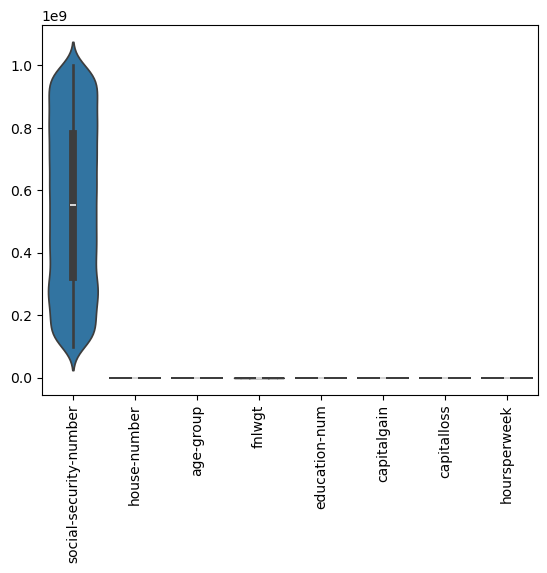

In [34]:
axes = seaborn.violinplot(
    data_train_numerical_features,
    order = numerical_features
)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

/tmp/ipykernel_6947/439515287.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


[Text(0, 0, 'social-security-number'),
 Text(1, 0, 'house-number'),
 Text(2, 0, 'age-group'),
 Text(3, 0, 'fnlwgt'),
 Text(4, 0, 'education-num'),
 Text(5, 0, 'capitalgain'),
 Text(6, 0, 'capitalloss'),
 Text(7, 0, 'hoursperweek')]

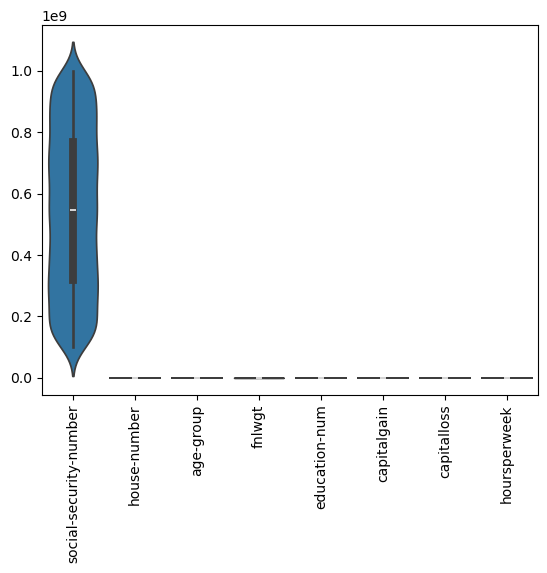

In [35]:
axes = seaborn.violinplot(
    data_test_numerical_features,
    order = numerical_features
)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

In [36]:
standard_scaler = sklearn.preprocessing.StandardScaler()
standard_scaler

StandardScaler()

In [37]:
standard_scaler.fit(data_train_numerical_features)

StandardScaler()

In [38]:
data_train_numerical_features = pandas.DataFrame(
    data    = standard_scaler.transform(data_train_numerical_features),
    columns = standard_scaler.get_feature_names_out(),
    index   = data_train_numerical_features.index
)
data_train_numerical_features

,social-security-number,house-number,age-group,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,,,,
825,-0.513954,0.192107,-1.532427,1.403050,-0.559057,-0.327449,-0.235977,-0.055892
7110,0.878445,0.791136,0.863654,0.159270,0.207392,-0.327449,-0.235977,1.086615
4726,1.616409,0.201870,0.863654,1.132649,1.740291,3.945562,-0.235977,-0.055892
4570,-0.028048,0.743018,0.064960,-0.062081,-0.559057,-0.327449,2.841843,2.229122
24219,1.228550,0.053682,-0.733733,0.191211,0.973842,-0.327449,-0.235977,-1.198399
...,...,...,...,...,...,...,...,...
10538,-1.262380,-1.434128,0.863654,0.031335,-0.175832,-0.327449,-0.235977,-0.055892
17709,0.986476,-1.106022,0.863654,-0.335554,0.973842,2.877309,-0.235977,-0.055892
8432,-1.161501,-0.263267,-1.532427,1.006723,0.207392,-0.327449,-0.235977,-0.055892


In [39]:
data_test_numerical_features = pandas.DataFrame(
    data    = standard_scaler.transform(data_test_numerical_features),
    columns = standard_scaler.get_feature_names_out(),
    index   = data_test_numerical_features.index
)
data_test_numerical_features

,social-security-number,house-number,age-group,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,,,,
23155,0.144470,1.339955,0.064960,0.565152,-0.559057,-0.327449,-0.235977,-0.055892
9294,0.357124,0.234646,0.064960,-0.842735,-0.559057,-0.327449,-0.235977,-0.055892
5664,-0.150454,1.582635,-1.532427,-0.479943,-0.175832,-0.327449,-0.235977,-0.055892
22607,0.164222,0.625514,0.064960,-0.759252,-0.559057,3.945562,-0.235977,1.086615
26944,-0.774245,-0.428191,0.064960,-0.137381,2.123516,-0.327449,-0.235977,-0.055892
...,...,...,...,...,...,...,...,...
7018,-0.337767,-1.603237,0.064960,-1.123387,-0.175832,-0.327449,-0.235977,-0.055892
13429,1.605304,-0.574288,0.064960,-0.112725,-2.475181,-0.327449,-0.235977,-2.340906
7448,0.755165,0.724887,0.064960,-0.257104,-0.175832,-0.327449,-0.235977,-0.055892


/tmp/ipykernel_6947/1656974928.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


[Text(0, 0, 'social-security-number'),
 Text(1, 0, 'house-number'),
 Text(2, 0, 'age-group'),
 Text(3, 0, 'fnlwgt'),
 Text(4, 0, 'education-num'),
 Text(5, 0, 'capitalgain'),
 Text(6, 0, 'capitalloss'),
 Text(7, 0, 'hoursperweek')]

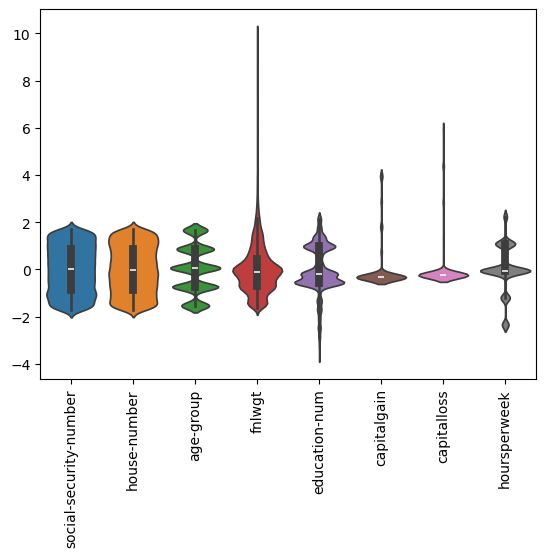

In [40]:
axes = seaborn.violinplot(
    data_train_numerical_features,
    order = numerical_features
)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

/tmp/ipykernel_6947/439515287.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


[Text(0, 0, 'social-security-number'),
 Text(1, 0, 'house-number'),
 Text(2, 0, 'age-group'),
 Text(3, 0, 'fnlwgt'),
 Text(4, 0, 'education-num'),
 Text(5, 0, 'capitalgain'),
 Text(6, 0, 'capitalloss'),
 Text(7, 0, 'hoursperweek')]

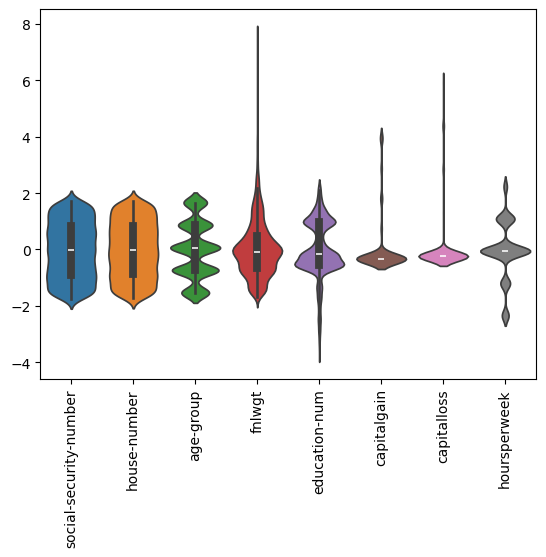

In [41]:
axes = seaborn.violinplot(
    data_test_numerical_features,
    order = numerical_features
)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

## For labels
- Use `sklearn.preprocessing.OrdinalEncoder` to create an ordinal encoder, then fit using the training data
    - Map {`no`, `yes`} to {0, 1} respectively
- Create a new `pandas.DataFrame` of ordinally encoded labels for both training and test data

In [42]:
label_encoder = sklearn.preprocessing.OrdinalEncoder(categories=[['0.0', '1.0',]])
label_encoder

OrdinalEncoder(categories=[['0.0', '1.0']])

In [43]:
label_encoder.fit(data_train[['label']])

OrdinalEncoder(categories=[['0.0', '1.0']])

In [44]:
data_train_label = pandas.DataFrame(
    data    = label_encoder.transform(data_train[['label']]),
    columns = ['label'],
    index   = data_train.index
)
data_train_label

,label
id,
825,0.0
7110,1.0
4726,1.0
4570,1.0
24219,0.0
...,...
10538,0.0
17709,1.0
8432,0.0


In [45]:
data_test_label = pandas.DataFrame(
    data    = label_encoder.transform(data_test[['label']]),
    columns = ['label'],
    index   = data_test.index
)
data_test_label

,label
id,
23155,1.0
9294,0.0
5664,0.0
22607,1.0
26944,1.0
...,...
7018,1.0
13429,0.0
7448,0.0


## Reconstruction of data sets
- Combine the 3 `pandas.DataFrame` to obtain the fully processed training and test data
    - Hint: use `.join`

In [46]:
data_train = (
    data_train_categorical_features
        .join(data_train_numerical_features)
        .join(data_train_label)
)
data_train

,workclass,education,marital-status,occupation,relationship,race,sex,social-security-number,house-number,age-group,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek,label
id,,,,,,,,,,,,,,,,
825,3.0,11.0,4.0,0.0,1.0,4.0,1.0,-0.513954,0.192107,-1.532427,1.403050,-0.559057,-0.327449,-0.235977,-0.055892,0.0
7110,3.0,8.0,2.0,3.0,0.0,4.0,1.0,0.878445,0.791136,0.863654,0.159270,0.207392,-0.327449,-0.235977,1.086615,1.0
4726,0.0,14.0,2.0,3.0,0.0,4.0,1.0,1.616409,0.201870,0.863654,1.132649,1.740291,3.945562,-0.235977,-0.055892,1.0
4570,3.0,11.0,2.0,2.0,0.0,4.0,1.0,-0.028048,0.743018,0.064960,-0.062081,-0.559057,-0.327449,2.841843,2.229122,1.0
24219,6.0,9.0,4.0,9.0,1.0,4.0,1.0,1.228550,0.053682,-0.733733,0.191211,0.973842,-0.327449,-0.235977,-1.198399,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10538,3.0,15.0,2.0,2.0,0.0,4.0,1.0,-1.262380,-1.434128,0.863654,0.031335,-0.175832,-0.327449,-0.235977,-0.055892,0.0
17709,3.0,9.0,2.0,9.0,0.0,2.0,1.0,0.986476,-1.106022,0.863654,-0.335554,0.973842,2.877309,-0.235977,-0.055892,1.0
8432,6.0,8.0,4.0,0.0,3.0,4.0,0.0,-1.161501,-0.263267,-1.532427,1.006723,0.207392,-0.327449,-0.235977,-0.055892,0.0


In [47]:
data_test = (
    data_test_categorical_features
        .join(data_test_numerical_features)
        .join(data_test_label)
)
data_test

,workclass,education,marital-status,occupation,relationship,race,sex,social-security-number,house-number,age-group,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek,label
id,,,,,,,,,,,,,,,,
23155,3.0,11.0,2.0,12.0,0.0,4.0,1.0,0.144470,1.339955,0.064960,0.565152,-0.559057,-0.327449,-0.235977,-0.055892,1.0
9294,3.0,11.0,2.0,7.0,5.0,4.0,0.0,0.357124,0.234646,0.064960,-0.842735,-0.559057,-0.327449,-0.235977,-0.055892,0.0
5664,3.0,15.0,0.0,0.0,1.0,4.0,0.0,-0.150454,1.582635,-1.532427,-0.479943,-0.175832,-0.327449,-0.235977,-0.055892,0.0
22607,3.0,11.0,0.0,11.0,1.0,4.0,1.0,0.164222,0.625514,0.064960,-0.759252,-0.559057,3.945562,-0.235977,1.086615,1.0
26944,3.0,10.0,2.0,3.0,0.0,4.0,1.0,-0.774245,-0.428191,0.064960,-0.137381,2.123516,-0.327449,-0.235977,-0.055892,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,0.0,15.0,2.0,0.0,0.0,1.0,1.0,-0.337767,-1.603237,0.064960,-1.123387,-0.175832,-0.327449,-0.235977,-0.055892,1.0
13429,3.0,5.0,4.0,0.0,3.0,4.0,0.0,1.605304,-0.574288,0.064960,-0.112725,-2.475181,-0.327449,-0.235977,-2.340906,0.0
7448,3.0,15.0,0.0,6.0,1.0,4.0,1.0,0.755165,0.724887,0.064960,-0.257104,-0.175832,-0.327449,-0.235977,-0.055892,0.0


# Instruction

- Define a `sklearn.neighbors.KNeighborsClassifier` model with the following configurations to be used as an estimator
```
        n_neighbors = 5,
        weights     = 'uniform', 
        p           = 2, 
```
    
- Use `sklearn.feature_selection.SequentialFeatureSelector` with the following configurations for automatic feature selection

```
        estimator            = model,
        n_features_to_select = 4,
        direction            = 'backward'

```

- Now, fit the feature selector to the training data


In [48]:
model = sklearn.neighbors.KNeighborsClassifier(
        n_neighbors=5,
        weights='uniform', 
        p= 2, 
)
model

KNeighborsClassifier()

In [49]:
feature_selection = sklearn.feature_selection.SequentialFeatureSelector(
        estimator= model,
        n_features_to_select=4,
        direction= 'backward' 
)
feature_selection

SequentialFeatureSelector(direction='backward',
                          estimator=KNeighborsClassifier(),
                          n_features_to_select=4)

In [50]:
feature_selection.fit(
    X=data_train.drop(['label'], axis='columns'),
    y=data_train['label'],
)


SequentialFeatureSelector(direction='backward',
                          estimator=KNeighborsClassifier(),
                          n_features_to_select=4)

# Instructions
- Use `.get_feature_names_out()` to get the optimal subset of features from the feature selector
- Create `pandas.DataFrame`s that contain only those selected features for training data and test data respectively 

In [51]:
selected_features = feature_selection.get_feature_names_out().tolist()
selected_features

['marital-status', 'age-group', 'education-num', 'capitalgain']

In [52]:
data_train_feature_selected = data_train[selected_features + ['label']]

In [53]:
data_test_feature_selected = data_test[selected_features + ['label']]

# Instructions
- Write the train data set to `./data/features.train.csv`
- Write the test data set to `./data/features.test.csv`

In [54]:
data_train_feature_selected.to_csv('./data/p_high_salary_features.train.csv')

In [55]:
data_test_feature_selected.to_csv('./data/p_high_salary_features.test.csv')